# Data Download

In [ ]:
from data_querier import DataQuerierYF
from config import load_config


configuration = load_config()
data_getter = DataQuerierYF(configuration)

# Equally weighted

In [1]:
from portfolios.equally_weighted import EquallyWeighted
from config import load_config


configuration = load_config()
portfolio = EquallyWeighted(configuration)
portfolio.data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.816809,4.826836,66.431755,12.591937,NaN,32.449608,18.250000,22.094467,43.607437,28.570000,...,19.624762,26.523657,57.094898,33.148170,21.926786,34.782356,49.557644,35.720001,14.441823,NaN
2012-01-04,23.627478,4.741989,67.989182,12.659609,NaN,32.560413,18.110001,22.008778,43.590965,28.280001,...,19.495552,26.245661,57.108147,33.138813,22.650696,35.019897,48.886982,35.450001,14.760459,NaN
2012-01-05,24.156307,5.156796,68.421791,12.800154,NaN,32.807621,18.270000,21.958136,42.759171,28.480000,...,19.581684,26.474596,56.935558,33.166908,22.327993,35.287128,49.465771,35.400002,15.173823,NaN
2012-01-06,24.417461,5.279352,68.739052,12.933966,NaN,32.892841,18.139999,21.759474,42.685047,28.719999,...,19.524265,26.302893,56.510658,32.970142,21.952940,35.542503,49.594410,35.110001,15.191041,NaN
2012-01-09,25.057272,5.392481,68.719810,12.913450,NaN,32.875797,18.209999,21.755568,42.610939,28.530001,...,19.538620,26.875231,56.762951,32.810871,22.040167,35.405914,49.961906,34.950001,15.397725,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,158.531204,18.170000,236.500000,180.330002,133.029587,131.899994,357.829987,140.962799,414.255981,577.679993,...,66.820000,222.779999,61.889999,55.841362,118.290001,138.009995,127.809998,606.330017,63.009998,246.509995
2021-12-28,158.970612,18.540001,238.130005,179.289993,133.009781,132.360001,357.440002,139.976273,414.196136,569.359985,...,67.620003,220.270004,61.689999,55.921204,119.519997,137.979996,128.210007,597.320007,63.110001,244.250000
2021-12-29,160.438675,18.049999,241.029999,179.380005,133.969818,133.339996,361.839996,140.693741,414.345795,569.289978,...,67.959999,217.619995,61.150002,56.540001,119.360001,138.660004,128.229996,601.119995,63.450001,247.029999


<AxesSubplot:title={'center':'Cumulative returns of the equally weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

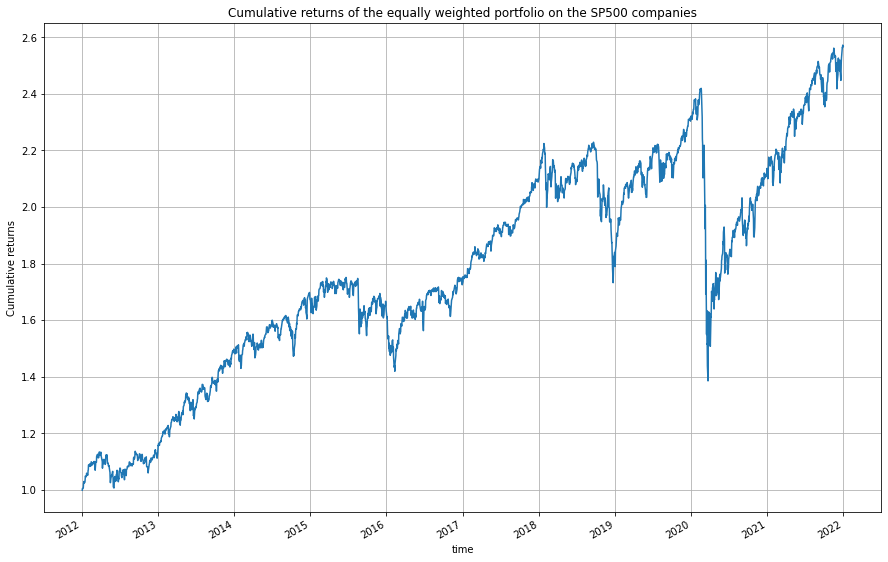

In [2]:
portfolio().plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the equally weighted portfolio on the SP500 companies", figsize=(15, 10)) 

# Market weights

In [3]:
from data_querier import SharesOutStandingQuerier



sharesout = SharesOutStandingQuerier(portfolio.data.columns, ("2012-01-01", "2021-12-31"), username="ghandri")


Loading library list...
Done
      permco ticker
0     8045.0   ORCL
1     8048.0   MSFT
2     8087.0   TROW
3    22168.0    HON
4    20207.0    ADM
..       ...    ...
407  52983.0      V
408  52985.0    AWK
409  52996.0    FRC
410   7267.0    UNH
411  47011.0  DISCK

[412 rows x 2 columns]


In [45]:
import pandas as pd
from functools import reduce
f = list(map(lambda x: x[1].drop(columns=["ticker"]).set_index("date").rename(columns={"shrout":x[0]}), filter(lambda x: len(x[1]) == 2265, sharesout.sharesout.merge(sharesout.permcos, on="permco").drop(columns=["permco"]).groupby(["ticker"]).__iter__())))
reduce(lambda x, y: x.merge(y, left_index=True, right_index=True), f)

,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XLNX,XOM,XRAY,YUM,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,348125.0,72446.0,932214.0,258343.0,38973.0,1557796.0,647209.0,491540.0,297961.0,667981.0,...,73575.0,536415.0,100513.0,484956.0,261835.0,4793208.0,141700.0,460496.0,51995.0,184135.0
2012-01-04,348125.0,72446.0,932214.0,258343.0,38973.0,1557796.0,647209.0,491540.0,297961.0,667981.0,...,73575.0,536415.0,100513.0,484956.0,261835.0,4793208.0,141700.0,460496.0,51995.0,184135.0
2012-01-05,348125.0,72446.0,932214.0,258343.0,38973.0,1557796.0,647209.0,491540.0,297961.0,667981.0,...,73575.0,536415.0,100513.0,484956.0,261835.0,4793208.0,141700.0,460496.0,51995.0,184135.0
2012-01-06,348125.0,72446.0,932214.0,258343.0,38973.0,1557796.0,647209.0,491540.0,297961.0,667981.0,...,73575.0,536415.0,100513.0,484956.0,261835.0,4793208.0,141700.0,460496.0,51995.0,184135.0
2012-01-09,348125.0,72446.0,932214.0,258343.0,38973.0,1557796.0,647209.0,491540.0,297961.0,667981.0,...,73575.0,536415.0,100513.0,484956.0,261835.0,4793208.0,141700.0,460496.0,51995.0,184135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,306000.0,67855.0,17001802.0,204250.0,45190.0,1772362.0,633566.0,479719.0,369485.0,556389.0,...,68094.0,746423.0,107871.0,525458.0,245122.0,4228234.0,218555.0,301668.0,53316.0,164012.0
2020-12-28,306000.0,67855.0,17001802.0,204250.0,45190.0,1772362.0,633566.0,479719.0,369485.0,556389.0,...,68094.0,746423.0,107871.0,525458.0,245122.0,4228234.0,218555.0,301668.0,53316.0,164012.0
2020-12-29,306000.0,67855.0,17001802.0,204250.0,45190.0,1772362.0,633566.0,479719.0,369485.0,556389.0,...,68094.0,746423.0,107871.0,525458.0,245122.0,4228234.0,218555.0,301668.0,53316.0,164012.0
